<a href="https://colab.research.google.com/github/danon6868/BI-ml-course/blob/main/3D_UNet_resolution_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Don't forget to use `GPU` here!

In [6]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device} as device")

Using cuda:0 as device


In [7]:
from IPython.display import clear_output
from google.colab import files

In [8]:
!git clone https://github.com/danon6868/CryoEM_Resolution_Estimation.git
!mv CryoEM_Resolution_Estimation/* .
!rm -rf CryoEM_Resolution_Estimation/
!pip install -r requirements.txt

clear_output()

In [5]:
!ls

3D_UNet_resolution_estimation.ipynb  README.md	requirements.txt  sample_data


In [4]:
%%bash
rm -rf images

## Check installation

In [9]:
!python -m resolution_estimation_with_dl.model_training.train_model -h

usage: train_model.py [-h] [--train_data TRAIN_DATA] [--valid_data VALID_DATA]
                      [--n_epochs N_EPOCHS] [-v {0,1,2}]
                      [--out_weights_dir OUT_WEIGHTS_DIR]
                      [--out_weights_filename OUT_WEIGHTS_FILENAME]

optional arguments:
  -h, --help            show this help message and exit
  --train_data TRAIN_DATA
                        Path to file with train samples.
  --valid_data VALID_DATA
                        Path to file with validation samples
  --n_epochs N_EPOCHS   The number of epochs to train the model
  -v {0,1,2}, --verbose {0,1,2}
                        The higher the value, the more information about
                        training will be displayed to the user
  --out_weights_dir OUT_WEIGHTS_DIR
                        The directory where model weights will be saved
  --out_weights_filename OUT_WEIGHTS_FILENAME
                        The filename with trained model weights


In [10]:
!python -m resolution_estimation_with_dl.resolution_estimation.run_model -h

usage: run_model.py [-h] [--models_path MODELS_PATH]
                    [--model_name {unet_3d_trained_dropout.pth,unet_3d_trained_batchnorm.pth}]
                    [--electron_density_map ELECTRON_DENSITY_MAP]
                    [--output_file_name OUTPUT_FILE_NAME]
                    [--device {cpu,cuda:0}]

optional arguments:
  -h, --help            show this help message and exit
  --models_path MODELS_PATH
                        Path to directory with saved models
  --model_name {unet_3d_trained_dropout.pth,unet_3d_trained_batchnorm.pth}
                        Model name to load. `unet_3d_trained_dropout.pth` and
                        `unet_3d_trained_batchnorm.pth` are available and
                        should be in `models_path` directory or they will be
                        downloaded (it is about 400 Mb). If you want to use
                        your own model, you should put its weights into
                        `models_path` directory yourself. Experimen

If you saw the manual for scripts, then everything installed well.

# Upload electron density map

Run next cell and select **.mrc** file you want:

In [ ]:
files.upload()

Saving 13939_map.mrc to 13939_map.mrc


# Run 3D-UNet

Here you can select whether to use model with dropout or with batch normalization. Just run following command in the bash cell below: 

```bash
python -m resolution_estimation_with_dl.resolution_estimation.run_model \
    --electron_density_map [YOUR .MRC FILE]
    --model_name unet_3d_trained_dropout.pth \
    --device cuda:0
```

In [11]:
%%bash
python -m resolution_estimation_with_dl.resolution_estimation.run_model --model_name unet_3d_trained_dropout.pth

2022-07-01 09:09:40.551 | INFO     | __main__:download_weights:38 - Downloading unet_3d_trained_dropout.pth in resolution_estimation_with_dl/model_weights/unet_3d_trained_dropout.pth...
Downloading...
From: https://drive.google.com/u/0/uc?id=1-Imt4lolu-dMMsNItYgLV8GFDKDGUCr0&export=download
To: /content/resolution_estimation_with_dl/model_weights/unet_3d_trained_dropout.pth
100%|██████████| 414M/414M [00:01<00:00, 310MB/s]
2022-07-01 09:09:44.071 | INFO     | __main__:download_weights:41 - Weights were successfully downloaded. Now you can predict your local resolution map!
2022-07-01 09:09:44.837 | INFO     | __main__:<module>:125 - Start local resolution map estimation using UNet3D...
2022-07-01 09:10:09.625 | INFO     | __main__:<module>:130 - Saving final electron density and local resolution maps into results/...
2022-07-01 09:10:10.419 | INFO     | __main__:<module>:135 - Final electron density and local resolution maps were saved successfully!


## Explore results

In the results folder you can see padded electron density map (for visualization) and estimated local resolution map (with `resolution` suffix). Now you can download these files and visualize, e. g. using *Chimera*:

In [15]:
%%bash
ls results/

13939_map.mrc
13939_map_resolution.mrc


## Download results

In [16]:
# Download electron density map
files.download("results/13939_map.mrc")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Download local resolution map
files.download("results/13939_map_resolution.mrc")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For example for EMD-13939 we can create the following visualization:

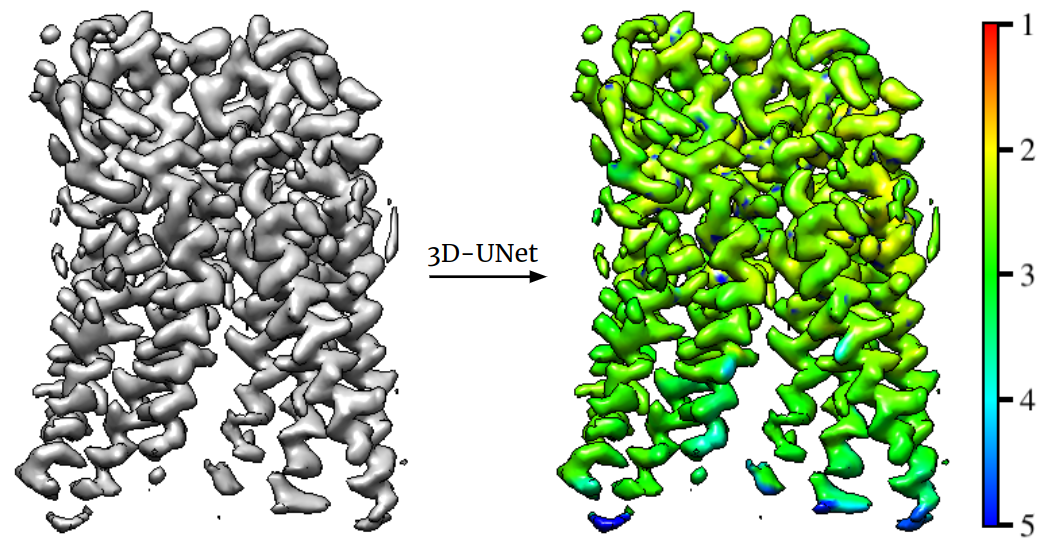

# Contacts

If you have any questions, please contact @Danil_litvinov &mdash; Telegram or danon6868@gmail.com &mdash; Email.